# Unit 7: Demonstration Central Limit Theorem


In [1]:
"""
Created on Tue Feb 24 17:09:44 2015

@author: Oliver Elison Timm

Purpose: Illustration of the Central Limit Theorem

Version: V3.1

History:
    2019-03    Converted from Python 2 into Python 3 code
    and inserted code from clt_v3.py script into Notebook format.
    
    2017-03-29 
    
    This script was modified to demonstrate the definition of a function
    and the assignment of return values (summary-function)
    This default version sums up two uniform random number samples.
    The code can be easily adjusted to more summation terms.
    [One can also switch to code making use of a loop
    and 2-dimensional data arrays with nsample rows and k columns.]
    
    2016-03-02 
    
    Removed some of the older code (simpler syntax)
    
    2015-03-03

    This version tests the effect of sample size in the averaging of IID random
    variables on the mean and standard deviation of the estimated mean.

"""

import numpy as np
import pylab as plt
# sometimes we just need one specific subpackage or function 
# in this case we want to have the Gaussian distribution support
from scipy.stats import norm 


def summary(y,):
    """Prints a summary for numpy array y (with the random variables)
    input parameter: y: a list or numpy array with numbers
    returns the mean, standard deviation, minimum and maximum value."""
    # end of function's docstring (shows up when typing help(summary))
    # Note the print function uses inside the strings the placeholder %12.4f for 
    # formatting the list (Python type 'tuple') of numbers such as mean and stddev
    # they are printed where %12.4f shows up in the string #########.####
    print ('Summary statistics for random variable Y:')
    print ('sample size='+str(len(y)))   
    m=np.mean(y)
    s=np.std(y)
    mn=np.min(y)
    mx=np.max(y)
    print ('estimated mean of Y=%12.4f; stddev of Y=%12.4f ' % (m,s))  
    print ('min-max range of the sample data Y: %12.4f - %12.4f ' % (mn,mx))
    return m,s, mn,mx

<P style="background-color:purple;color:gold;font-size:133%">
<BR>
 Main code section (Users should only make changes below)
<BR>
<BR>
</P>

In [11]:
# **********************************************************
# Main part
# **********************************************************
isCheck=True
# create uniformly distributed random numbers
nsample=1000 # this is n in the description

# two independent and identically distributed random number sets
x1=np.random.uniform(size=nsample)
x2=np.random.uniform(size=nsample)
y=x1+x2

if isCheck:
    print('-------------------------')
    print('just checking: what is y?')
    print('object type: ', type(y))
    print('length:' + str(len(y)))
    print('should be a 1-dim array with '+str(nsample)+' numbers')
    print('-------------------------')

print("y=x1+x2:")
print("--------")

m,s,mn,mx=summary(y)

-------------------------
just checking: what is y?
object type:  <class 'numpy.ndarray'>
length:1000
should be a 1-dim array with 1000 numbers
-------------------------
y=x1+x2:
--------
Summary statistics for random variable Y:
sample size=1000
estimated mean of Y=      1.0122; stddev of Y=      0.4062 
min-max range of the sample data Y:       0.0253 -       1.9893 


/kt11/ktyle/anaconda3_201903/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/kt11/ktyle/anaconda3_201903/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/kt11/ktyle/anaconda3_201903/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


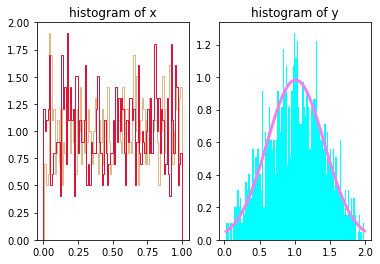

In [12]:
# figure with two histograms side by side
# sharing the same y-axis range is set off    
nbin=100 # controls how many bins (bars) the histgram uses
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False)
# left figure
ax[0].hist(x1,bins=nbin,color='burlywood',normed=True,histtype='step')
ax[0].hist(x2,bins=nbin,color='crimson',normed=True,histtype='step')
ax[0].set_title('histogram of x')
# right figure
ax[1].hist(y,bins=nbin,color='cyan',normed=True)
ax[1].set_title('histogram of y')


# last compare with the 'best fitted gaussian PDF
# location parameter is the mean of y and scale parameter is the 
# standard deviation of y

xhelp=np.linspace(mn,mx,num=100)

gaussian=norm.pdf(xhelp,m,s)
ax[1].plot(xhelp,gaussian,color='violet',linewidth=3)

fig.show()